# Restaurant Analysis

## Level-2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df[df.duplicated()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df.dropna(subset='Cuisines', inplace=True)

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Task-1 : Restaurant ratings

1. Analyze the distribution of aggregate 
ratings and determine the most common 
rati_range.
2. Calculate the average number of votes 
received by restaurants.e.

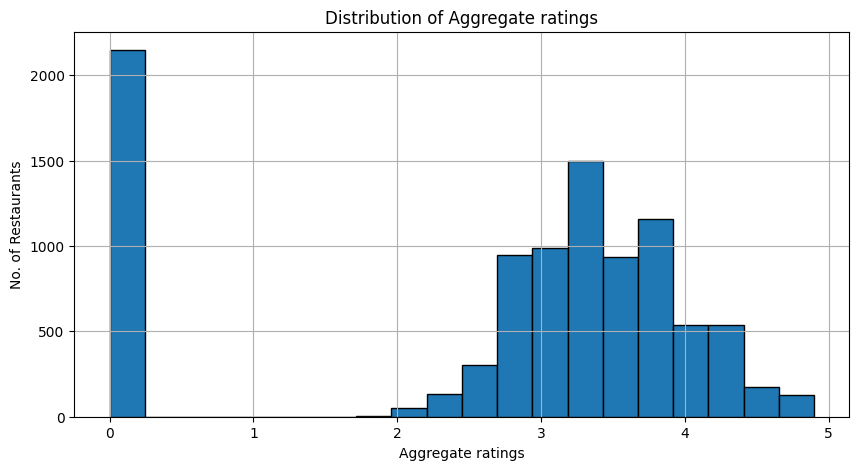

In [26]:
plt.figure(figsize=(10,5))
df['Aggregate rating'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Aggregate ratings')
plt.xlabel('Aggregate ratings')
plt.ylabel('No. of Restaurants')
plt.show()

In [28]:
rating_counts = df['Aggregate rating'].value_counts()
rating_counts

most_common_rating_range = rating_counts.max()
most_common_rating_range

2148

In [30]:
df['Votes'].mean()

156.7720603647034

# Task-2 : Cuisine Combination

1. Identify the most common combinations of 
cuisines in the dataset
2. Determine if certain cuisine combinations 
tend to have higher ratings..

In [50]:
cuisines = pd.Series(df['Cuisines'].str.split(','))
cuisines

0              [French,  Japanese,  Desserts]
1                                  [Japanese]
2       [Seafood,  Asian,  Filipino,  Indian]
3                          [Japanese,  Sushi]
4                         [Japanese,  Korean]
                        ...                  
9546                                [Turkish]
9547      [World Cuisine,  Patisserie,  Cafe]
9548                [Italian,  World Cuisine]
9549                        [Restaurant Cafe]
9550                                   [Cafe]
Name: Cuisines, Length: 9542, dtype: object

In [54]:
import collections
from collections import Counter

In [55]:
cuisines_combination_count = Counter(tuple(combination) for combination in cuisines if len(combination)>1)
cuisines_combination_count

Counter({('North Indian', ' Chinese'): 511,
         ('North Indian', ' Mughlai'): 334,
         ('North Indian', ' Mughlai', ' Chinese'): 197,
         ('Bakery', ' Desserts'): 170,
         ('Pizza', ' Fast Food'): 131,
         ('Chinese', ' Fast Food'): 118,
         ('Mithai', ' Street Food'): 116,
         ('Bakery', ' Fast Food'): 108,
         ('Chinese', ' North Indian'): 105,
         ('Ice Cream', ' Desserts'): 83,
         ('North Indian', ' Fast Food'): 74,
         ('North Indian', ' Chinese', ' Mughlai'): 70,
         ('North Indian', ' Chinese', ' Fast Food'): 68,
         ('North Indian', ' Chinese', ' Continental'): 65,
         ('Bakery', ' Desserts', ' Fast Food'): 63,
         ('American', ' Fast Food', ' Salad', ' Healthy Food'): 62,
         ('Mughlai', ' North Indian'): 60,
         ('Fast Food', ' Burger'): 56,
         ('Chinese', ' Thai'): 51,
         ('Raw Meats', ' North Indian', ' Fast Food'): 49,
         ('North Indian', ' South Indian', ' Chinese'): 46

In [67]:
cuisines_combination_count.most_common(1)

[(('North Indian', ' Chinese'), 511)]

In [77]:
df['comb_cuisines'] = df['Cuisines'].str.split(',')
df.explode('comb_cuisines').groupby('comb_cuisines')['Aggregate rating'].mean()

comb_cuisines
 Afghani         3.528571
 African         3.216667
 American        3.924107
 Andhra          4.028571
 Arabian         3.365217
                   ...   
Turkish          3.171429
Turkish Pizza    4.300000
Vietnamese       4.133333
Western          3.700000
World Cuisine    4.500000
Name: Aggregate rating, Length: 249, dtype: float64

In [81]:
df.groupby(['Cuisines'])['Aggregate rating'].mean().reset_index().max()

Cuisines            World Cuisine, Patisserie, Cafe
Aggregate rating                                4.9
dtype: object

# Task-3 : Geographic Analysis

1. Plot the locations of restaurants on a 
map using longitude and latitud 
coordinate
2. Identify any patterns or clusters of 
restaurants in specific areas.s.

In [90]:
import plotly.express as px

In [96]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'comb_cuisines'],
      dtype='object')

In [95]:
figure = px.scatter_geo(df, 
                        lat='Latitude', 
                        lon='Longitude', 
                        title='Restaurant Location', 
                        color='Restaurant Name', 
                        hover_name='Restaurant Name')

#figure.show()

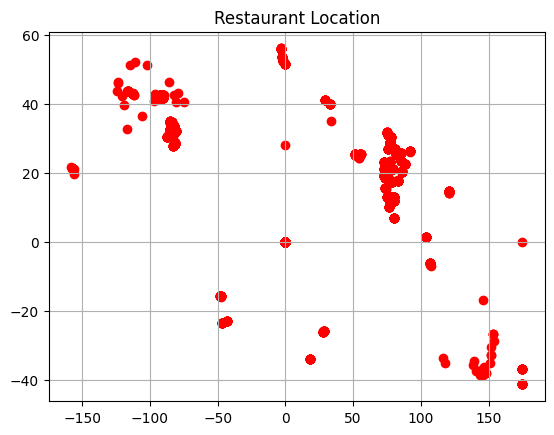

In [94]:
plt.scatter(df['Longitude'], df['Latitude'], color='red')
plt.title('Restaurant Location')
plt.grid(True)
plt.show()

# Task-4 : Restaurant Chains

1. Identify if there are any restaurant chains 
present in the dataset
2. Analyze the ratings and popularity of different restaurant chains.ins.

In [99]:
chains = df['Restaurant Name'].value_counts()
chains[chains>1]

Restaurant Name
Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
                                  ..
Zaika Kathi Rolls                  2
The Night Owl                      2
The Cheesecake Factory             2
New Kadimi                         2
Ceviche Tapas Bar & Restaurant     2
Name: count, Length: 734, dtype: int64

In [105]:
new_df = pd.DataFrame({
    'Average Rating' : df.groupby('Restaurant Name')['Aggregate rating'].mean(),
    'Total Votes': df.groupby('Restaurant Name')['Votes'].sum()
})
new_df.sort_values(by='Average Rating',ascending=False)

,Average Rating,Total Votes
Restaurant Name,,
Mirchi And Mime,4.9,3244
Yellow Dog Eats,4.9,1252
Tresind - Nassima Royal Hotel,4.9,1352
Ingleside Village Pizza,4.9,478
Indian Accent - The Manor,4.9,1934
...,...,...
Parantha on Call,0.0,0
Paras Chicken Point,0.0,1
Paras Corner,0.0,0
